In [2]:
# Stopped at page 105 of PDF

# The Reuters Dataset

You'll work with the <i>Reuters dataset</i>, a set of short newswires and their topics, published by Reuters in 1986. It's a simple, widely used dataset for text classification. There are 46 different topics; some are mosre represented than others, but each topic has at least 10 examples in the training set. Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras.

In [3]:
# Loading the Reuters dataset

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [4]:
"""
As with the IMDB dataset, the argument num_words=10000 restricts the data to the
10,000 most frequently occuring words found in the data.
"""

print(len(train_data))
print(len(test_data))

8982
2246


In [5]:
# As with the IMDB reviews, each example is a list of integers (word indeices)

print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [6]:
# Here is how you can decode it back to words

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in \
                             train_data[0]])

print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
# The label associated with an example is an integer between 0 and 45 - a topic
# index.

print(train_labels[10])

3


In [8]:
# Vectorize the data (same as the the code in previous notebooks in chapter 3)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
"""
To vectorize the labels, there are two possibilities: you can cast the label list
as an integer tensor, or you can use one-hot encoding. One-hot encoding is a 
widely used format for categorical data, also called categorical encoding. In this
case, one-hot encoding of the labels consists of embedding each label as an all-
zero vector with a 1 in the place of the label index.
"""

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
ont_hot_test_labels = to_one_hot(test_labels)

In [10]:
"""
Note that there is a built-in way to do this in Keras, which you've already
seen in action in the MNIST example.
"""

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

<h3>Building your network</h3>

This topic-classification problem looks similar to the previous movie-review classification problem: in both cases, you're trying to classify short snippets of text. But there is a new constraint here: the number of output classes has gone from 2 to 46. The dimensionality of the output space is much larger.

In a stack of Dense layers like that you've been using, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this problem can never be recovered by later layers; each layer can potentially become an information bottleneck. In the previous example, you used 16-dimensional intermediate layers, but a 16-dimensional space may be to limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information.

For this reason, you'll use larger layers (in this case, 64 units).

In [11]:
# Model definition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


There are two other things you should note about this architecture:
- You end the network with a Dense layer of size 46. This means for each input sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
- The last layer uses a softmax activation. You saw this pattern in the MNIST example. It means the network will output a probability distribution over the 46 different output classes - for every input sample, the network will produce a 46-dimensional output vector, where the outpu[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.

In [12]:
# Compiling the model

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
# Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 186us/step - loss: 2.5308 - accuracy: 0.5293 - val_loss: 1.6810 - val_accuracy: 0.6410
Epoch 2/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.3879 - accuracy: 0.7103 - val_loss: 1.2830 - val_accuracy: 0.7180
Epoch 3/20
7982/7982 [==============================] - 1s 123us/step - loss: 1.0308 - accuracy: 0.7772 - val_loss: 1.1278 - val_accuracy: 0.7520
Epoch 4/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.8167 - accuracy: 0.8217 - val_loss: 1.0318 - val_accuracy: 0.7860
Epoch 5/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.6530 - accuracy: 0.8592 - val_loss: 0.9521 - val_accuracy: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.5241 - accuracy: 0.8930 - val_loss: 0.9114 - val_accuracy: 0.8090
Epoch 7/20
7982/7982 [======

In [15]:
# Print out the key values of the History object

print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


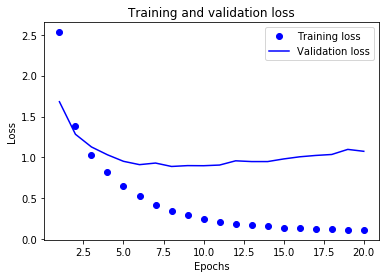

In [17]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

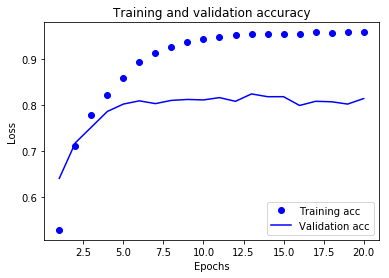

In [18]:
# Plotting the training and validation accuracy

plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
"""
The network begins to overfit after nine epochs. Let's train a new network from
scratch for nine epochs and then evaluate it on the test set.
"""

# Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 141us/step - loss: 2.6452 - accuracy: 0.5041 - val_loss: 1.7115 - val_accuracy: 0.6480
Epoch 2/9
7982/7982 [==============================] - 1s 117us/step - loss: 1.3999 - accuracy: 0.7093 - val_loss: 1.2867 - val_accuracy: 0.7260
Epoch 3/9
7982/7982 [==============================] - 1s 116us/step - loss: 1.0435 - accuracy: 0.7819 - val_loss: 1.1294 - val_accuracy: 0.7690
Epoch 4/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.8239 - accuracy: 0.8276 - val_loss: 1.0355 - val_accuracy: 0.7920
Epoch 5/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.6554 - accuracy: 0.8627 - val_loss: 0.9747 - val_accuracy: 0.7980
Epoch 6/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.5207 - accuracy: 0.8908 - val_loss: 0.9259 - val_accuracy: 0.8150
Epoch 7/9
7982/7982 [==============================] - 1s 116us/step - loss: 0.418

In [20]:
# Here are the final results

print(results)

[0.9680644056145251, 0.7898486256599426]


In [21]:
"""
This approacch reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case it's closer to 19%, so the results seem pretty good, at least when
compared to a random baseline.
"""

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)

print(hits_array)
print(float(np.sum(hits_array)) / len(test_labels))

[False False False ... False False False]
0.19011576135351738


<h3>Generating predictions on new data</h3>

You can verify that the predict method of the model instance returns a probability distribution over all 46 topics. Let's generate topic predictions for all of the test data.

In [22]:
# Generating predictions for new data

predictions = model.predict(x_test)

In [23]:
# Each entry in predictions is a vector of length 46

print(predictions[0].shape)

(46,)


In [24]:
# The coefficients in this vector sum up to 1 (or close)

print(np.sum(predictions[0]))

1.0000001


In [25]:
# The largest entry is the predicted class - the class with the highest probability

print(np.argmax(predictions[0]))

3


<h3>A different way to handle the labels and the loss</h3>

We mentioned earlier that another way to encode the labels would be to cast them as an integer tensor, like this:

In [26]:
x_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing this approach would change is the choice of the loss function. The loss function categorical_crossentropy expects the labels to follow a categorical encoding. The integer labels, you should use sparse_categorical_crossentropy.

In [29]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# This new loss function is still mathematically the same as categorical_crossentropy,
# it just has a different interface.

We mentioned earlier that because the final outputs are 46-dimensional, you should avoid intermediate layers with many fewer than 46 hidden units. Let's see what happens when you introduce an information bottleneck by having intermediate layers that are significantly less than 46-dimensional: for example, 4-dimensional.

In [30]:
# A model with an information bottleneck

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 186us/step - loss: 3.2622 - accuracy: 0.0748 - val_loss: 2.7406 - val_accuracy: 0.2340
Epoch 2/20
7982/7982 [==============================] - 1s 163us/step - loss: 2.1609 - accuracy: 0.4724 - val_loss: 1.7474 - val_accuracy: 0.5750
Epoch 3/20
7982/7982 [==============================] - 1s 164us/step - loss: 1.5836 - accuracy: 0.5827 - val_loss: 1.5375 - val_accuracy: 0.5810
Epoch 4/20
7982/7982 [==============================] - 1s 167us/step - loss: 1.3638 - accuracy: 0.6391 - val_loss: 1.4168 - val_accuracy: 0.6490
Epoch 5/20
7982/7982 [==============================] - 1s 175us/step - loss: 1.1998 - accuracy: 0.6926 - val_loss: 1.3473 - val_accuracy: 0.6800
Epoch 6/20
7982/7982 [==============================] - 1s 177us/step - loss: 1.0732 - accuracy: 0.7221 - val_loss: 1.3169 - val_accuracy: 0.6930
Epoch 7/20
7982/7982 [==============================] - 1s 165us/step - loss

The network experiences a 10% drop in validation accuracy. This is mostly due to the fact that you're trying to compress a lot of information into an intermediate space that is too low-dimensional. The network is able to cram most of the necessary information into these eight-dimensional representations, but not all of it.